In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/data_banknote_authentication.csv')

In [3]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


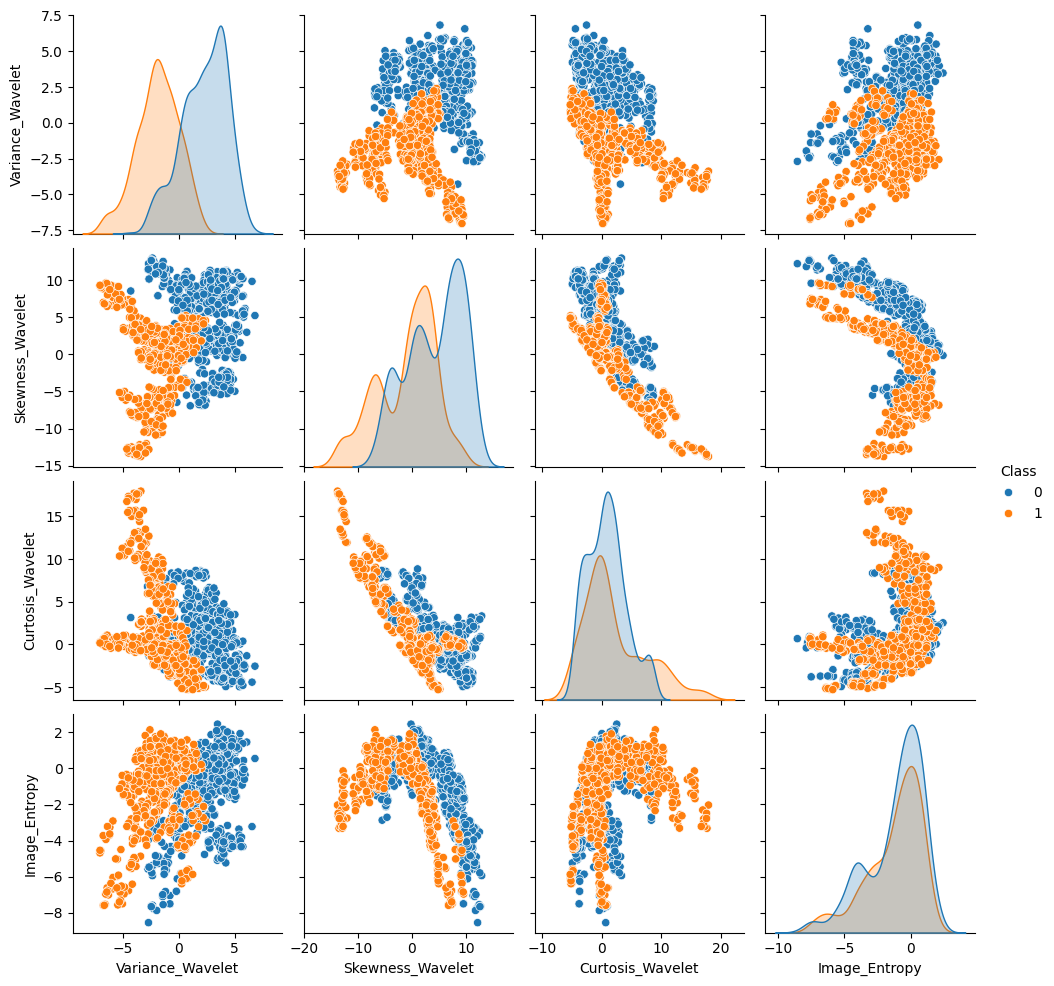

In [5]:
sns.pairplot(data = df,hue='Class')

In [6]:
X = df.drop('Class',axis = 1)

In [8]:
y = df['Class']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.15, random_state=101)
...

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
n_estimators = [64,100,128,200]

In [14]:
max_features = [2,3,4]

In [15]:
bootstrap = [True,False]

In [16]:
oob_score  = [True,False]

In [18]:
param_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'bootstrap':bootstrap,
    'oob_score':oob_score
}

In [19]:
rfc = RandomForestClassifier()

In [20]:
grid = GridSearchCV(rfc,param_grid)

In [22]:
grid.fit(X_train,y_train)

C:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\_forest.py", line 448, in fit
    raise ValueError("

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [23]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128, 'oob_score': True}

In [31]:
rfc = RandomForestClassifier(bootstrap=True,max_features=2,n_estimators=128,oob_score=True)

In [32]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features=2, n_estimators=128, oob_score=True)

In [33]:
rfc.oob_score_

0.9948542024013722

In [34]:
predictions = rfc.predict(X_test)

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



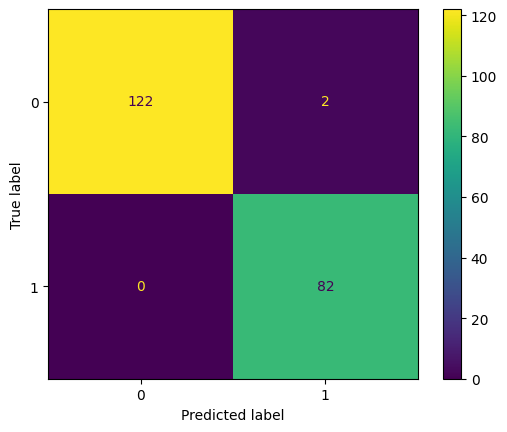

In [36]:
ConfusionMatrixDisplay.from_estimator(rfc,X_test,y_test)

In [41]:
errors = []
misclassifications = []

for n in range(1,200):
    rfc = RandomForestClassifier(n_estimators=n,max_features=2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = accuracy_score(y_test,preds)
    n_missed = np.sum(preds != y_test)

    errors.append(err)
    misclassifications.append(n_missed)

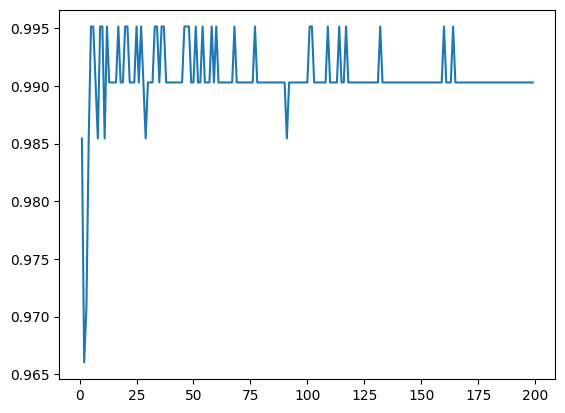

In [42]:
plt.plot(range(1,200),errors)

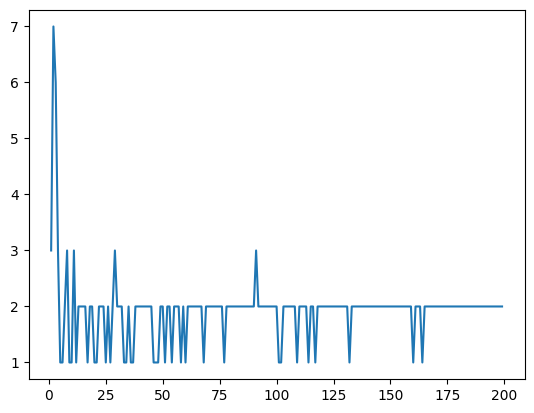

In [43]:
plt.plot(range(1,200),misclassifications)